
<div class="alert alert-block alert-success">
    <h1 align="center">Covid-19 Cases</h1>
    
</div>

### Introduction
**Coronavirus disease 2019 (COVID-19)** is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in *Wuhan, China*, in December 2019. The disease has since spread worldwide, leading to an ongoing pandemic.

### Symptoms
Symptoms of COVID-19 are variable, but often include *fever, cough, headache, fatigue, breathing difficulties, and loss of smell and taste*.Symptoms may begin *one to fourteen days* after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

### Transmutation
COVID-19 transmits when people breathe in air contaminated by droplets and small airborne particles containing the virus. The risk of breathing these in is highest when people are in close proximity, but they can be inhaled over longer distances, particularly indoors. Transmission can also occur if splashed or sprayed with contaminated fluids in the eyes, nose or mouth, and, rarely, via contaminated surfaces. People remain contagious for up to 20 days, and can spread the virus even if they do not develop symptoms.

Several testing methods have been developed to diagnose the disease. The standard diagnostic method is by detection of the virus' nucleic acid by real-time reverse transcription polymerase chain reaction (rRT-PCR), transcription-mediated amplification (TMA), or by reverse transcription loop-mediated isothermal amplification (RT-LAMP) from a nasopharyngeal swab.

Several COVID-19 vaccines have been approved and distributed in various countries, which have initiated mass vaccination campaigns. Other preventive measures include physical or social distancing, quarantining, ventilation of indoor spaces, covering coughs and sneezes, hand washing, and keeping unwashed hands away from the face. The use of face masks or coverings has been recommended in public settings to minimize the risk of transmissions. While work is underway to develop drugs that inhibit the virus, the primary treatment is symptomatic. Management involves the treatment of symptoms, supportive care, isolation, and experimental measures.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as  sns
from sklearn.metrics import r2_score

import tensorflow as tf




## Import Data

In [2]:
df0 = pd.read_csv("../input/covid-19-cases/Dataset/data/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("../input/covid-19-cases/Dataset/data/CONVENIENT_global_deaths.csv")

## Data Preparation

In [3]:
countries = df0.iloc[:,1:].columns
countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia.1',
       ...
       'United Kingdom.11', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=279)

**Create a dataframe containing `Country` and `Cases` columns in it**

In [4]:
world = pd.DataFrame({"Country":[],"Cases":[]})
# Pass all the countrie to the world dataframe
world['Country'] = df0.iloc[:,1:].columns
cases = []
for i in world['Country']:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world['Cases'] = cases

country_list = list(world['Country'].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac+=1
    idx += 1
world['Country'] = country_list
world = world.groupby('Country')['Cases'].sum().reset_index()
world.head()

,Country,Cases
0,Afghanistan,155682.0
1,Albania,176667.0
2,Algeria,205005.0
3,Andorra,15326.0
4,Angola,62385.0


In [5]:
continent = pd.read_csv("../input/covid-19-cases/Dataset/continents/continents2.csv")
continent["name"] = continent["name"].str.upper()
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,AMERICAN SAMOA,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


## Data Viualization

In [6]:
world.head()

,Country,Cases
0,Afghanistan,155682.0
1,Albania,176667.0
2,Algeria,205005.0
3,Andorra,15326.0
4,Angola,62385.0


In [7]:
world['Cases Range'] = pd.cut(world['Cases'],[10000,50000,200000,800000,1500000,15000000],labels=["U50K","50kto200k","200kto800k","800kto1.5M","1.5M+"])


In [8]:
alpha = []
for i in world['Country'].str.upper().values:
    if i == "BRUNEI":
        i = "BRUNEI DARUSSALAM"
    elif i == "US":
        i = "UNITED STATES"
    if len(continent[continent["name"] == i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha

In [9]:
world.head()

,Country,Cases,Cases Range,Alpha3
0,Afghanistan,155682.0,50kto200k,AFG
1,Albania,176667.0,50kto200k,ALB
2,Algeria,205005.0,200kto800k,DZA
3,Andorra,15326.0,U50K,AND
4,Angola,62385.0,50kto200k,AGO


In [10]:
world['Country'] = world['Country'].str.upper()
world.head()

,Country,Cases,Cases Range,Alpha3
0,AFGHANISTAN,155682.0,50kto200k,AFG
1,ALBANIA,176667.0,50kto200k,ALB
2,ALGERIA,205005.0,200kto800k,DZA
3,ANDORRA,15326.0,U50K,AND
4,ANGOLA,62385.0,50kto200k,AGO


In [11]:
world.isna().sum()

Country         0
Cases           0
Cases Range    35
Alpha3         13
dtype: int64

In [12]:
fig = px.choropleth(world.dropna(),
                   locations='Alpha3',
                   color='Cases Range',
                   projection='mercator',
                   color_discrete_sequence=['khaki','yellow','lightblue','red','orange'])
fig.update_geos(fitbounds='locations',visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
plt.show()

In [13]:
# Daily cases all around the world
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df['Date'] = df0['Country/Region'][1:]
df['Cases'] = count
df = df.set_index('Date')

# Daily death cases all around the world
count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df['Deaths'] = count

df.head()

,Cases,Deaths
Date,,
1/23/20,98.0,1.0
1/24/20,286.0,8.0
1/25/20,493.0,16.0
1/26/20,684.0,14.0
1/27/20,809.0,26.0


In [14]:
# remove decimal values
pd.set_option('precision',0)
df.head()

,Cases,Deaths
Date,,
1/23/20,98,1
1/24/20,286,8
1/25/20,493,16
1/26/20,684,14
1/27/20,809,26


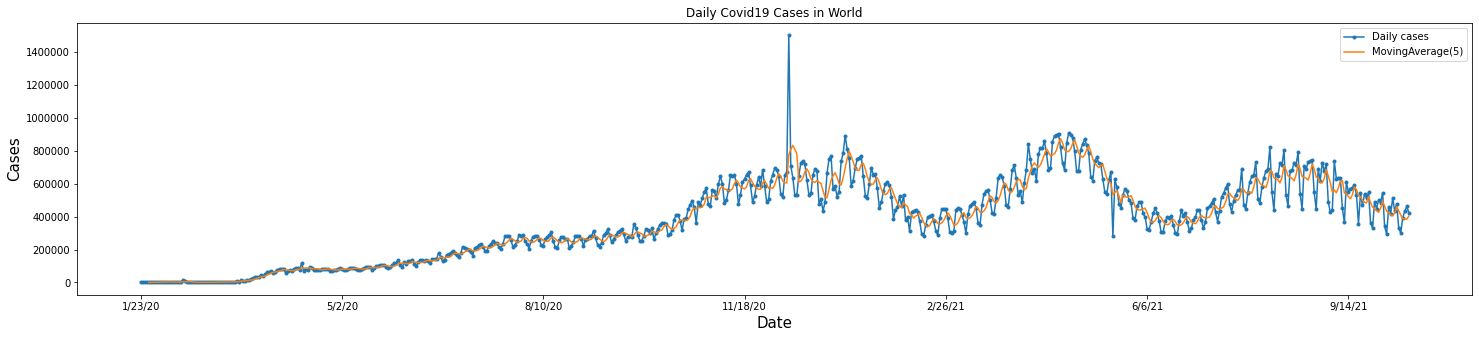

In [15]:
# Daily covid19 cases

plt.ticklabel_format(style='plain')
df.Cases.plot(title='Daily Covid19 Cases in World',marker=".",figsize=(10,8),label="Daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(25,5),label='MovingAverage(5)')
plt.ylabel("Cases",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.legend()
plt.show();

In [16]:
fig = px.line(df, y='Cases',title='Daily Covid 19 Cases in World')
fig.show();

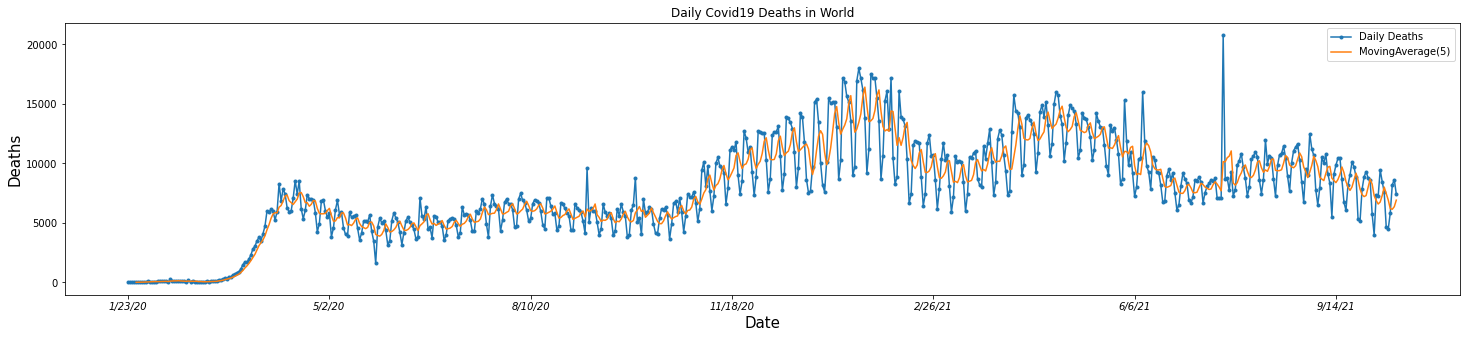

In [17]:
# Daily covid19 Death Cases
df.Deaths.plot(title='Daily Covid19 Deaths in World', marker=".",label="Daily Deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(25,5),label='MovingAverage(5)')
plt.ylabel("Deaths",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.xticks(fontstyle='oblique',fontsize=10)
plt.legend()
plt.show();

In [18]:
fig = px.line(df, y='Deaths',title='Daily Covid 19 Death Cases in World')
fig.show();

In [19]:
# parse dates from 'df' dataframe
set_date = pd.to_datetime(df.index)
df.index = set_date

In [20]:
df.head()

,Cases,Deaths
Date,,
2020-01-23,98,1
2020-01-24,286,8
2020-01-25,493,16
2020-01-26,684,14
2020-01-27,809,26


In [21]:
# Get  data array
timesteps = df.index.to_numpy()
cases = df['Cases'].to_numpy()
deaths = df['Deaths'].to_numpy()

timesteps[:10],cases[:10],deaths[:10]

(array(['2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
        '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
        '2020-01-27T00:00:00.000000000', '2020-01-28T00:00:00.000000000',
        '2020-01-29T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
        '2020-01-31T00:00:00.000000000', '2020-02-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([  98.,  286.,  493.,  684.,  809., 2651.,  589., 2068., 1692.,
        2111.]),
 array([ 1.,  8., 16., 14., 26., 49.,  2., 38., 42., 46.]))

## Split dataset into Train and Test

The best way to split the time series data is to avoid the random_split


In [22]:
# Create train and test splits the right way for time series
split_size = int(0.8 * len(df))

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], cases[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], cases[split_size:]

len(X_train),len(X_test), len(y_train), len(y_test)

(504, 127, 504, 127)

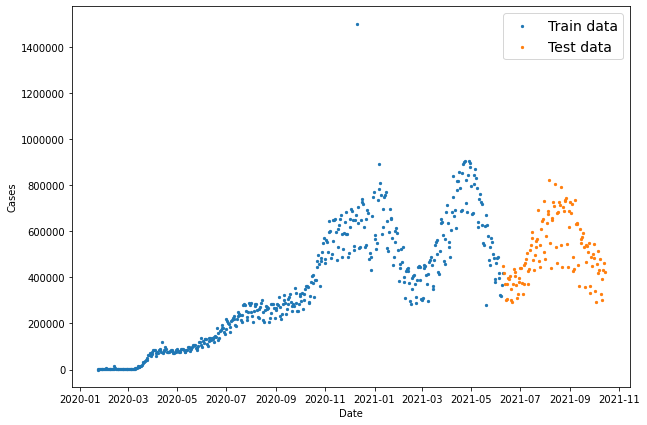

In [23]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.ticklabel_format(style='plain')
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend(fontsize=14)
plt.show();

## Baseline Model : Naive Forecast

As usual, let's start with a baseline

One of the most common baseline models for time series forecasting, the naive model (also called the`naive forecast`), requires no training at all.

That's because all the naive model does is use the previous timestep value to predict the next timestep value

The formula looks like this


In [24]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Naive forecast every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]

(array([449723., 420823., 372702., 303514., 307551., 371205., 398656.,
        392501., 406697., 349368.]),
 array([458454., 417394., 513188., 431896., 478661., 329269., 300669.,
        393375., 432550., 462666.]))

In [25]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series

    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Cases")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

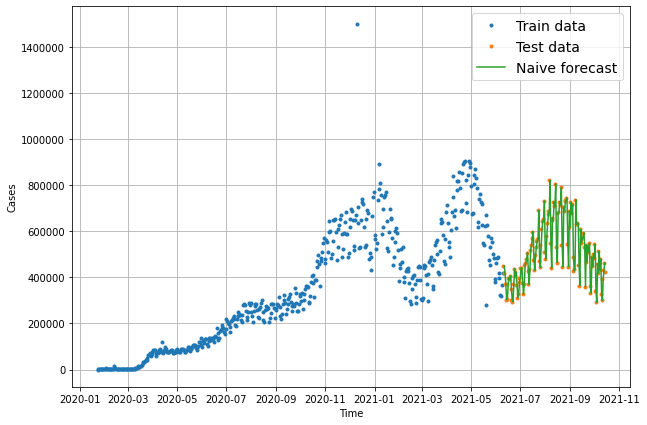

In [26]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plt.ticklabel_format(style='plain')
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [27]:
import tensorflow as tf


In [28]:
# MASE implemented
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Calculates the Mean Absolute Scaled Error
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

    return mae/mae_naive_no_season

In [29]:
# evaluate metrics function
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_pred = tf.cast(y_pred, dtype=tf.float64)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [30]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

2021-10-25 04:41:16.218650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 04:41:16.219756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 04:41:16.220387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 04:41:16.224655: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

{'mae': 75916.48412698413,
 'mse': 10799176178.97619,
 'rmse': 103919.08476779514,
 'mape': 15.319415070624098,
 'mase': 0.9950698784137135}

### Format Data : Windowing Dataset

Windowing is a method to turn a time series dataset into **supervised learning problem**

In other words, we want to use windows of the past to predict the future

```
Window for one month (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]

```

In [31]:
HORIZON = 7
WINDOW_SIZE = 30


In [32]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=7):
    """
    Creates an window and label for the data
    
    Example: Window: [1, 2, 3, 4,5, 6,7] -> [8]
    """
    
    return x[:,:-horizon], x[:,-horizon:]

In [33]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(30)+1,axis=0),horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] -> Label: [24 25 26 27 28 29 30]


In [34]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=30,horizon=7):
    """
    Turns a 1D array into a 2D array of sequential windows of window size
    """
    # Create a window of specific window_size(add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # Create 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    # Index on the target array(time series) with 2D array of multiple window steps
    #
    windowed_array = x[window_indexes]
    
    # Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return windows, labels

In [35]:
full_windows, full_labels = make_windows(cases, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(595, 595)

In [36]:
# View the first 3 windows/labels
pd.set_option('precision',0)
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [   98.   286.   493.   684.   809.  2651.   589.  2068.  1692.  2111.
  4749.  3100.  4011.  3745.  3162.  3594.  2731.  3031.  2608.  2042.
   418. 15152.  6528.  2143.  2183.  2035.  1882.   500.   560.   629.] -> Label: [1761.  380.  568.  854.  977. 1359. 1388.]
Window: [  286.   493.   684.   809.  2651.   589.  2068.  1692.  2111.  4749.
  3100.  4011.  3745.  3162.  3594.  2731.  3031.  2608.  2042.   418.
 15152.  6528.  2143.  2183.  2035.  1882.   500.   560.   629.  1761.] -> Label: [ 380.  568.  854.  977. 1359. 1388. 1894.]
Window: [  493.   684.   809.  2651.   589.  2068.  1692.  2111.  4749.  3100.
  4011.  3745.  3162.  3594.  2731.  3031.  2608.  2042.   418. 15152.
  6528.  2143.  2183.  2035.  1882.   500.   560.   629.  1761.   380.] -> Label: [ 568.  854.  977. 1359. 1388. 1894. 2378.]


In [37]:
# make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    
    """
    Splits matching pairs of windows and labels into train and test splits
    """
    split_size=int(len(windows)*(1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels,test_labels

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(476, 119, 476, 119)

## Make a modelling checkpoint

In order for a fair comparison, we want to compare each model's best performance against each model's best performance against each model's best performance.

For example, if `model_1` performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model's from epoch 55 to compare to other model's rahter than the version of the model from epoch 100.

And the same goes for each of our other models:compare the best agoinst the best.

To take of this, we'll implement a `ModelCheckpoint` callback.

The `ModelCheckpoint callback` will monitor our model's performance during training and save the best model to file by setting `save_best_only=True`.

That way when evaluating our model we could restore its best performing configuration from file.

🔑 **Note:** Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the **ModelCheckpoint** callback to save the best model).

In [39]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoint'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                             verbose=0,
                                             save_best_only=True)

## Model 1: Dense Model(Window=30, horizon =7)

In [40]:
from tensorflow.keras import layers, Sequential

# set random seed for as reproducile results as possible
tf.random.set_seed(42)

# Model
model_1 = Sequential(name='model_1_dense')
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(HORIZON,activation='linear'))


# compile model
model_1.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])

# Fit the model
model_1.fit(x=train_windows,
           y=train_labels,
           epochs=100,
           verbose=1,
           batch_size=128,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_1.name)])

2021-10-25 04:41:21.614736: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
4/4 [==============================] - 1s 51ms/step - loss: 319959.6562 - mae: 319959.6562 - val_loss: 319116.2812 - val_mae: 319116.2812


2021-10-25 04:41:23.267274: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 198163.9062 - mae: 198163.9062 - val_loss: 192482.8281 - val_mae: 192482.8281
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 127234.1328 - mae: 127234.1328 - val_loss: 152909.2031 - val_mae: 152909.2031
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 103925.8828 - mae: 103925.8828 - val_loss: 147859.8281 - val_mae: 147859.8281
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 99336.5469 - mae: 99336.5469 - val_loss: 135178.9844 - val_mae: 135178.9844
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 92696.3984 - mae: 92696.3984 - val_loss: 118987.9844 - val_mae: 118987.9844
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 86138.6719 - mae: 86138.6719 - val_loss: 106888.2578 - val_mae: 106888.2578
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 80415.7578 - mae: 80415.7578 - val_loss: 

In [41]:
# Evaluate modelon test data
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 45499.9570 - mae: 45499.9570


[45499.95703125, 45499.95703125]

In [42]:
# make preds
def make_preds(model,input_data):
    
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [43]:
# make prediction using model_1 on the test dataset
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds), model_1_preds[:10]

(119,
 <tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[306631.8 , 287545.72, 320737.12, 347159.78, 383590.3 , 384134.7 ,
         376571.22],
        [326000.2 , 309793.3 , 360737.8 , 419256.6 , 377213.7 , 427850.22,
         390622.47],
        [321288.25, 356928.72, 375060.62, 346537.47, 368993.1 , 284555.97,
         315831.53],
        [343910.47, 419797.66, 386232.3 , 344979.5 , 306132.28, 373748.3 ,
         285887.22],
        [386569.5 , 364066.25, 341468.5 , 284664.34, 272769.94, 278783.34,
         349365.06],
        [347108.12, 318603.62, 346185.03, 289252.62, 291310.6 , 344523.03,
         361641.78],
        [398365.7 , 368950.2 , 310426.2 , 274005.8 , 364634.  , 418583.25,
         368996.47],
        [355316.8 , 350591.53, 252823.08, 363391.44, 422010.34, 346759.6 ,
         379396.28],
        [274670.16, 282118.6 , 344087.38, 384117.03, 411617.88, 383828.47,
         345674.88],
        [271079.72, 342814.  , 392403.38, 392066.94, 372806.38, 339375.88,
     

## Make our evaluation function work for larger horizons

In [44]:
def evaluate_preds(y_true, y_pred):
    """
    Calculates all the metrics used for Mean Absolute Error, Mean Squared Error,
    Root Mean Squared Error, Mean Absolute Percentage Error, Mean Absolute Scaled Error
    ----------------------------------------------------------------------------------
    y_true = True labels 
    y_pred = Predicted labels
    
    """
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(y_pred,dtype=tf.float32)
    
   # calculate various metric
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true,y_pred)
    
    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    return {'mae':mae.numpy(),
           'mse':mse.numpy(),
           'rmse':rmse.numpy(),
           'mape':mape.numpy(),
           'mase':mase.numpy()}

In [45]:
# Get model_3 results aggregated to single values
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 45499.957,
 'mse': 3280609800.0,
 'rmse': 55248.16,
 'mape': 8.855825,
 'mase': 0.5818434}

## Model 2 : Conv1D (WINDOW=30, HORIZON=7)

In [46]:
from tensorflow.keras.layers import Conv1D

# set random seed
tf.random.set_seed(42)

# model_2
model_2 = Sequential(name='model_2_conv1d')
model_2.add(layers.Lambda(lambda x : tf.expand_dims(x,axis=1)) )
model_2.add(Conv1D(128,kernel_size=3,padding='same',activation='relu'))
model_2.add(layers.Dense(HORIZON))

# compile
model_2.compile(loss='mae',
               optimizer='adam',
               metrics=['mae'])

# fit
model_2.fit(train_windows,
           train_labels,
           epochs=100,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100


2021-10-25 04:42:02.634034: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


15/15 [==============================] - 6s 12ms/step - loss: 307647.5000 - mae: 308153.3438 - val_loss: 112488.3594 - val_mae: 113009.4688
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 256857.2500 - mae: 256769.0000 - val_loss: 186512.8125 - val_mae: 191212.7656
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 251079.1250 - mae: 251458.4844 - val_loss: 163687.0469 - val_mae: 167660.0781
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 251378.2344 - mae: 251456.2344 - val_loss: 172156.7031 - val_mae: 176381.6250
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 252725.0469 - mae: 252658.6875 - val_loss: 166704.7656 - val_mae: 170596.3594
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 249689.7344 - mae: 249695.1094 - val_loss: 160367.1562 - val_mae: 163971.7656
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 251449.6406 - mae: 251654.4844 -

In [47]:
# evaluate on test data
model_2.evaluate(test_windows,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 160228.0469 - mae: 163068.5469


[160228.046875, 163068.546875]

In [48]:
# make prediction
model_2_preds = make_preds(model_2,test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[294216.  , 308248.72, 318211.28, 316845.16, 298984.22, 307203.22,
        331639.66],
       [292886.62, 288878.78, 318178.1 , 312655.9 , 315416.16, 303196.8 ,
        297032.53],
       [313545.88, 291363.3 , 304635.88, 314764.3 , 312129.34, 303451.38,
        259185.69],
       [279599.84, 301226.53, 299732.62, 294786.7 , 270911.47, 274469.75,
        314463.94],
       [283645.3 , 280833.56, 277185.75, 295314.9 , 273930.6 , 264584.94,
        303967.75],
       [288561.75, 270699.3 , 279221.  , 287003.12, 296940.16, 295585.9 ,
        287655.9 ],
       [247176.12, 276864.44, 285229.9 , 280680.84, 281415.28, 284928.03,
        278250.75],
       [293108.12, 278152.6 , 290358.34, 268998.  , 282652.25, 271978.88,
        301801.97],
       [292952.84, 276081.5 , 289811.38, 297872.34, 281738.1 , 280343.16,
        286018.66],
       [282652.  , 277161.94, 286348.12, 292761.22, 285186.75, 277801.03,
        276042.  ]], dtype=floa

In [49]:
# Evaluate metrics
model_2_results = evaluate_preds(y_true=test_labels,
                                y_pred=model_2_preds)
model_2_results

{'mae': 158604.14,
 'mse': 34205810000.0,
 'rmse': 176061.28,
 'mape': 28.185339,
 'mase': 2.0281947}

## Model 3 : RNN(WINDOW=30,HORIZON=7)

In [50]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) 
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=output, name="model_3_lstm")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [51]:
# Load in best version of model 5 and evaluate on the test data
model_3 = tf.keras.models.load_model("model_checkpoint/model_3_lstm/")
model_3.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 54022.8945


54022.89453125

In [52]:
# prediction
model_3_preds = make_preds(model_3,test_windows)
model_3_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[410093.78, 351178.9 , 312353.03, 365919.84, 377601.75, 408639.5 ,
        399959.28],
       [374695.9 , 334399.6 , 314644.12, 377764.25, 393090.84, 395703.8 ,
        373179.44],
       [321709.25, 330714.22, 355126.12, 382881.  , 324825.06, 335525.75,
        284621.8 ],
       [435337.66, 489084.7 , 411833.44, 449037.22, 328469.44, 372318.44,
        361379.6 ],
       [368696.34, 368236.47, 355509.06, 320171.78, 299208.78, 285864.53,
        298678.2 ],
       [378794.84, 345474.47, 279244.12, 254371.92, 290846.44, 278899.12,
        326803.78],
       [354955.56, 350536.8 , 309431.88, 282626.97, 305628.97, 318911.03,
        355702.  ],
       [330835.12, 294613.1 , 274538.38, 287562.3 , 369718.  , 371568.34,
        355240.5 ],
       [311657.7 , 300438.78, 311316.06, 364169.5 , 360512.34, 374505.75,
        318658.5 ],
       [309551.2 , 339281.25, 356757.66, 396744.56, 349819.66, 329385.2 ,
        278418.72]], dtype=floa

In [53]:
# evaluate metrics
model_3_results = evaluate_preds(y_true=test_labels,
                               y_pred=model_3_preds)
model_3_results

{'mae': 54022.895,
 'mse': 4517285000.0,
 'rmse': 64112.758,
 'mape': 10.708129,
 'mase': 0.6908328}

## Model 4: Kats 

In [54]:
!pip install kats

     |████████████████████████████████| 6.3 MB 519 kB/s 
     |████████████████████████████████| 866 kB 50.3 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 503 kB 48.7 MB/s 
     |████████████████████████████████| 486 kB 46.0 MB/s 
  Created wheel for kats: filename=kats-0.1.0-py3-none-any.whl size=286607 sha256=19339c45f3aad4d41a629fa83e0dfe8ee4c51eba415d120a5540e26d72ae8132
  Stored in directory: /root/.cache/pip/wheels/c8/dd/5b/cc7cb7fc37c5b838c65e504437bba4c1828a3fbb473c0c11be
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=6641036 sha256=d088139a52cf7bd58547cf0708a9b337aa33986d4129455585a0c95213c6e5cc
  Stored in directory: /root/.cache/pip/wheels/82/e8/a8/53f37f0a409bc51f8693e967dcce8f88bfd33632b40a594a28
Successfully built kats fbprophet
  Attempting uninstall: fbprophet
    Found existing installation: fbprophet 0.7.1
    Uninstalling fbprophet-0.7.1:
      Successfully uninstalled fbprophet-0.7.

In [55]:
# Importing the TimeseriesData class from kats
from kats.consts import TimeSeriesData

In [56]:
# Utils to work with kats
from dateutil import parser
from datetime import datetime


In [57]:

# Importing the things we need 
from kats.models.ensemble.ensemble import EnsembleParams , BaseModelParams 
from kats.models.ensemble.kats_ensemble import KatsEnsemble
from kats.models import (
    arima, 
    holtwinters , 
    linear_model , 
    prophet , 
    quadratic_model , 
    sarima , 
    theta
)

In [58]:

# Defining the parameters of different models 
model_params = EnsembleParams(
    [
     BaseModelParams('arima' , arima.ARIMAParams(p = 1 , d=1 , q=1)) , 
     BaseModelParams('sarima' ,
                     sarima.SARIMAParams(
                         p = 2 , d= 2 , q =1 , trend = 'ct' , 
                     seasonal_order = (1, 0 ,1 ,12) , enforce_invertibility = False , 
                     enforce_stationarity = False),
     ),
     BaseModelParams('prophet' , prophet.ProphetParams()) , 
     BaseModelParams('linear' , linear_model.LinearModelParams()) , 
     BaseModelParams('quadratic' , quadratic_model.QuadraticModelParams()),
     BaseModelParams('theta' , theta.ThetaParams()), 
    ]
)

In [59]:

# Creating KatEnsembleParam with detailed configuration 
KatEnsembleParams = {
    'models': model_params , 
    'aggregation': 'median' , 
    'seasonality_length': 7 , 
    'decomposition_method': 'multiplicative'
}

In [60]:

# Creating a Time Series dataset 
covid_ts = TimeSeriesData(value = df.Cases,
                            time = df.index , 
                            sort_by_time= True)

In [61]:

# Creating a KatEnsemble model (or) instantiating it 
ensemble_model = KatsEnsemble(
    data = covid_ts , 
    params = KatEnsembleParams
)

# Fitting the model 
ensemble_model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureW

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19153D+01    |proj g|=  4.62741D-04

At iterate    5    f=  1.19153D+01    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.776D-07   1.192D+01
  F =   11.915291746103463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


Initial log joint probability = -16.7379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1156.19    0.00171702        86.094       1.528      0.4059      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       1156.95    0.00141238       87.0336   1.711e-05       0.001      281  LS failed, Hessian reset 
     199       1157.67   1.81567e-05       53.3452     0.03822           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       1157.68   4.41187e-06       76.6044   6.544e-08       0.001      443  LS failed, Hessian reset 
     299       1157.68   3.39046e-06       57.1541      0.3054           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       1157.68   1.98888e-08       65.7739     0.05774           1      502   
Optimization terminat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/conda/lib/python3.7/site-packages/kats/models/theta.py:121: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



Initial log joint probability = -16.7379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1156.19    0.00171702        86.094       1.528      0.4059      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       1156.95    0.00141238       87.0336   1.711e-05       0.001      281  LS failed, Hessian reset 
     199       1157.67   1.81567e-05       53.3452     0.03822           1      312   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       1157.68   4.41187e-06       76.6044   6.544e-08       0.001      443  LS failed, Hessian reset 
     299       1157.68   3.39046e-06       57.1541      0.3054           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       1157.68   1.98888e-08       65.7739     0.05774           1      502   
Optimization terminat

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/conda/lib/python3.7/site-packages/kats/models/theta.py:121: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 relea

In [62]:
# Making prediction for the next 60 days 
forecast = ensemble_model.predict(steps = 60)

In [63]:

# Aggregate individual model results (we will get the predictions for 30 Days)
ensemble_model.aggregate()

,time,fcst,fcst_lower,fcst_upper
0,2021-10-15,490293,380536,604010
1,2021-10-16,396574,277458,487244
2,2021-10-17,365996,250999,472773
3,2021-10-18,454944,315492,571119
4,2021-10-19,457234,313756,572606
5,2021-10-20,489954,357176,622906
6,2021-10-21,464108,311073,588789
7,2021-10-22,491136,345999,624346
8,2021-10-23,395402,253038,506424
9,2021-10-24,362813,238742,488258


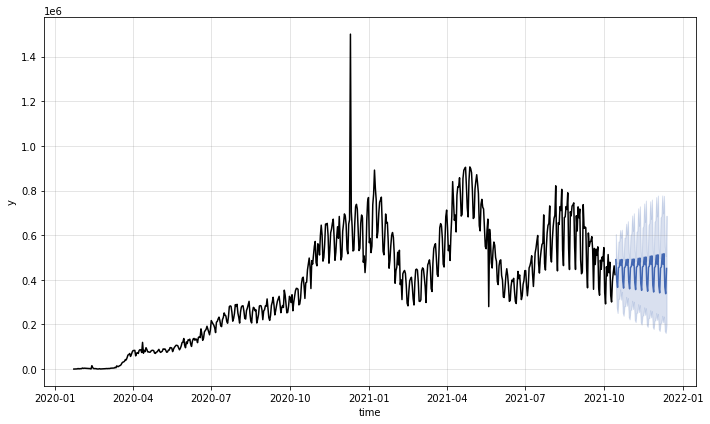

In [64]:
# Plotting the model 
ensemble_model.plot()

In [65]:
all_model_results = pd.DataFrame({"Naive_Resutlts":naive_results,
                                 "Simple Dense": model_1_results,
                                 "Conv1D":model_2_results,
                                 "RNN":model_3_results}).T
all_model_results

,mae,mse,rmse,mape,mase
Naive_Resutlts,75916,1e+10,103919,15,1e+00
Simple Dense,45500,3e+09,55248,9,6e-01
Conv1D,158604,3e+10,176061,28,2e+00
RNN,54023,5e+09,64113,11,7e-01


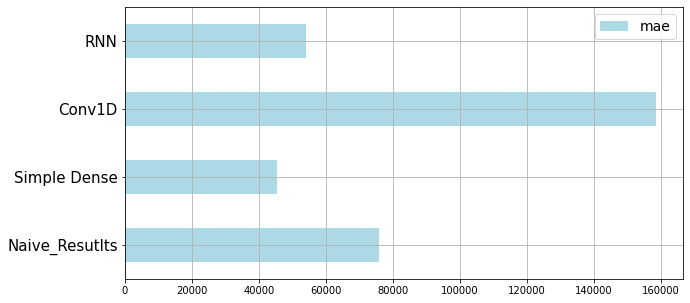

In [66]:
all_model_results['mae'].plot(figsize=(10,5),kind='barh',color='lightblue')
plt.legend(fontsize=14)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show();